In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#define a transform to analize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,),
                                )])
#download the dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [7]:
#build the model
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10)
                     )
#Define the loss
criterion = nn.CrossEntropyLoss()

#get the data
images, labels = next(iter(trainloader))

#flatten images
images = images.view(images.shape[0], -1)

#feedforward
ff = model(images)

#calculate the loss
loss = criterion(ff, labels)
print(loss)

tensor(2.3055, grad_fn=<NllLossBackward>)


We build here again the same model but using LogSoftmax and NLLLoss

In [12]:
from torch import optim

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1)
                     )
#Define the loss
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #flatten images
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad() #reset the gradient value
        #feedforward
        logps = model(images)
        #calculate the loss
        loss = criterion(logps, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.947004918986038
Training loss: 0.8761956619619052
Training loss: 0.5335551062817259
Training loss: 0.43536829645000796
Training loss: 0.3897376448583247


In [19]:
%matplotlib inline
import helper

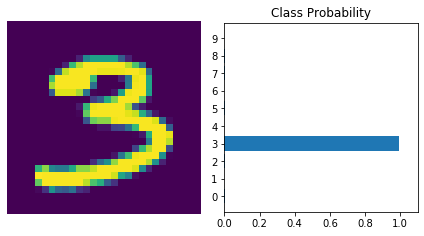

In [20]:
images, labels = next(iter(trainloader))

img = images[0].view(1,784)
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28), ps)